In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import image
import matplotlib.pyplot as plt

In [2]:
#Checking format of tensorflow dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

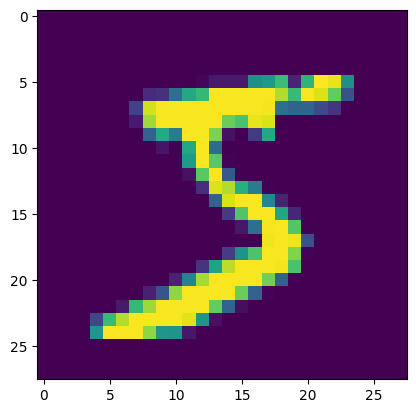

In [3]:
x_train
plt.imshow(x_train[0])

In [4]:
#Testing on single image
new_img = image.imread("/content/4561.png")
new_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

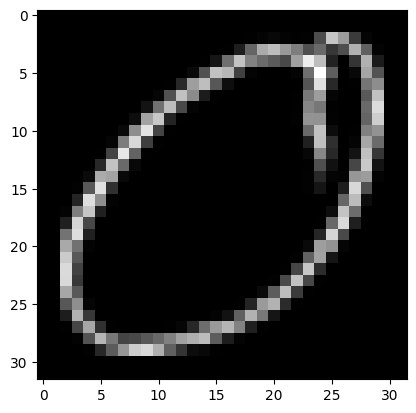

In [5]:
plt.imshow(new_img,cmap='gray')

In [15]:
!pip install kaggle
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d anurags397/hindi-mnist-data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 94% 15.0M/15.9M [00:00<00:00, 25.2MB/s]
100% 15.9M/15.9M [00:00<00:00, 17.4MB/s]


In [16]:
!unzip -q /content/hindi-mnist-data.zip -d /content/Dataset

In [17]:
# Creating numpy arrays from kaggle dataset
import os

In [19]:
# Checking loop through all images
count1=0
count2=0
for i in range(9):
    directory1=f"/content/Dataset/DevanagariHandwrittenDigitDataset/Train/digit_{i}"
    directory2=f"/content/Dataset/DevanagariHandwrittenDigitDataset/Test/digit_{i}"
    for filename in os.listdir(directory1):
        f = os.path.join(directory1, filename)
        # checking if it is a file
        if os.path.isfile(f):
            count1=count1+1
    for filename in os.listdir(directory2):
        f = os.path.join(directory2, filename)
        # checking if it is a file
        if os.path.isfile(f):
            count2=count2+1
    
print(count1)
print(count2)

15300
2700


In [20]:
#Defining numpy array for 15,300 images each 32x32 pixel size

X_train=np.zeros((15300,32,32))
X_test=np.zeros((2700,32,32))
Y_train=np.zeros((15300,))
Y_test=np.zeros((2700,))

In [22]:
#Reading images
index_train=0
index_test=0
for i in range(9):
    directory_train=f"/content/Dataset/DevanagariHandwrittenDigitDataset/Train/digit_{i}"
    directory_test=f"/content/Dataset/DevanagariHandwrittenDigitDataset/Test/digit_{i}"
    for filename in os.listdir(directory_train):
        f = os.path.join(directory_train, filename)
        # checking if it is a file
        if os.path.isfile(f):
            img= image.imread(f)
            X_train[index_train]=img
            Y_train[index_train]=i
            index_train=index_train+1
    for filename in os.listdir(directory_test):
        f = os.path.join(directory_test, filename)
        # checking if it is a file
        if os.path.isfile(f):
            img= image.imread(f)
            X_test[index_test]=img
            Y_test[index_test]=i
            index_test=index_test+1

6.0

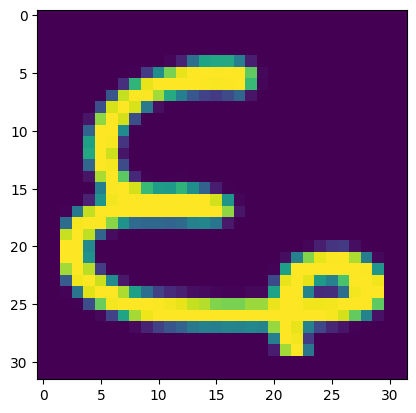

In [36]:
#Testing if data is read correctly

plt.imshow(X_test[2000])
Y_test[2000]

In [24]:
print(X_train[10])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [25]:
print(X_train[10].shape)

(32, 32)


In [42]:
# setting up layers for Neural Network
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32)),
    keras.layers.Dense(50, activation = 'relu'),    # Number of neurons = 50
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')   # output layer, number of neurons = number of classes of classiying classes(0-9)
])

In [43]:
# compiling the model

model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# labels 0-9 integers but if we had outputs as One Hot Encoder[0-1] then we had to use loss= 'categorical_crossentropy'

In [44]:
# training the neural network we have
model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
479/479 [==============================] - 3s 4ms/step - loss: 0.3735 - accuracy: 0.8907
Epoch 2/10
479/479 [==============================] - 2s 4ms/step - loss: 0.1147 - accuracy: 0.9670
Epoch 3/10
479/479 [==============================] - 1s 3ms/step - loss: 0.0760 - accuracy: 0.9784
Epoch 4/10
479/479 [==============================] - 1s 3ms/step - loss: 0.0571 - accuracy: 0.9827
Epoch 5/10
479/479 [==============================] - 1s 3ms/step - loss: 0.0435 - accuracy: 0.9878
Epoch 6/10
479/479 [==============================] - 1s 3ms/step - loss: 0.0330 - accuracy: 0.9910
Epoch 7/10
479/479 [==============================] - 1s 3ms/step - loss: 0.0273 - accuracy: 0.9916
Epoch 8/10
479/479 [==============================] - 1s 3ms/step - loss: 0.0241 - accuracy: 0.9921
Epoch 9/10
479/479 [==============================] - 1s 3ms/step - loss: 0.0162 - accuracy: 0.9952
Epoch 10/10
479/479 [==============================] - 2s 4ms/step - loss: 0.0092 - accuracy: 0.9980

In [45]:
model.fit(X_test, Y_test, epochs = 10)

Epoch 1/10
85/85 [==============================] - 1s 7ms/step - loss: 0.1108 - accuracy: 0.9700
Epoch 2/10
85/85 [==============================] - 0s 4ms/step - loss: 0.0415 - accuracy: 0.9867
Epoch 3/10
85/85 [==============================] - 0s 5ms/step - loss: 0.0137 - accuracy: 0.9956
Epoch 4/10
85/85 [==============================] - 1s 6ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 5/10
85/85 [==============================] - 0s 5ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 6/10
85/85 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 7/10
85/85 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 8/10
85/85 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 9/10
85/85 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 10/10
85/85 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000


8.0

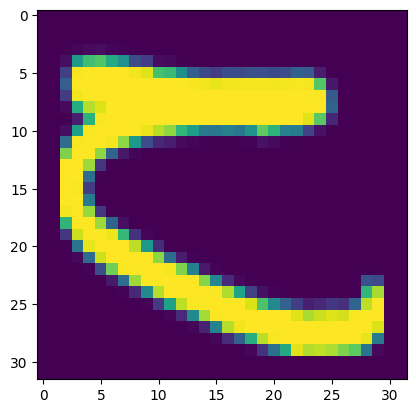

In [55]:
# Display first data point in X_test
plt.imshow(X_test[2500])
Y_test[2500]

In [51]:
y_pred = model.predict(X_test)
# it gives prediction probability of particular data entry for each class

85/85 [==============================] - 1s 5ms/step


In [52]:
print(y_pred.shape)

(2700, 10)


In [56]:
print(y_pred[2500])

[9.9624443e-01 5.7590824e-01 9.9952066e-01 8.2865499e-11 3.8669290e-04
 1.9321944e-04 1.2319919e-03 2.3220022e-01 1.0000000e+00 1.5348703e-11]


Here the 9th value 1.0000000e+00 is the highest probability which is of the label '8'

In [57]:
# converting prediction probabilities to class label
label_for_first_image = np.argmax(y_pred[0])
label_for_first_image

0

In [58]:
# converting prediction probabilties to class label for all test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [59]:
print(y_pred)

[[1.0000000e+00 8.5510051e-01 7.7158451e-01 ... 9.9847561e-01
  2.2056103e-02 2.4497824e-09]
 [1.0000000e+00 9.9494582e-01 1.3365080e-02 ... 9.9999839e-01
  2.4133682e-01 1.7674053e-09]
 [1.0000000e+00 9.9792147e-01 3.4109622e-02 ... 9.9013656e-01
  8.2534093e-01 1.5938301e-07]
 ...
 [5.8964004e-05 3.3305332e-02 7.8050703e-01 ... 1.9005989e-03
  1.0000000e+00 2.8424054e-05]
 [1.0033240e-04 1.0493422e-02 9.4513249e-01 ... 2.0563602e-03
  1.0000000e+00 4.9182677e-07]
 [2.5662415e-05 9.6807786e-04 1.0317364e-01 ... 1.9223841e-03
  1.0000000e+00 2.1615035e-06]]


y_test -----> True Label 

y_pred_labels ----> Predicted Labels


In [63]:
# confusion matrix(true values, predicted values)
from tensorflow.math import confusion_matrix
conf_mat = confusion_matrix(Y_test, y_pred_labels)
conf_mat

<tf.Tensor: shape=(9, 9), dtype=int32, numpy=
array([[300,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 300,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 300,   0,   0,   0,   0,   0,   0],
       [  0,   0,   6, 294,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 300,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 300,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 300,   0,   0],
       [  2,   0,   0,   0,   0,   0,   0, 298,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0, 299]], dtype=int32)>

Text(0.5, 47.7222222222222, 'Predicted Labels')

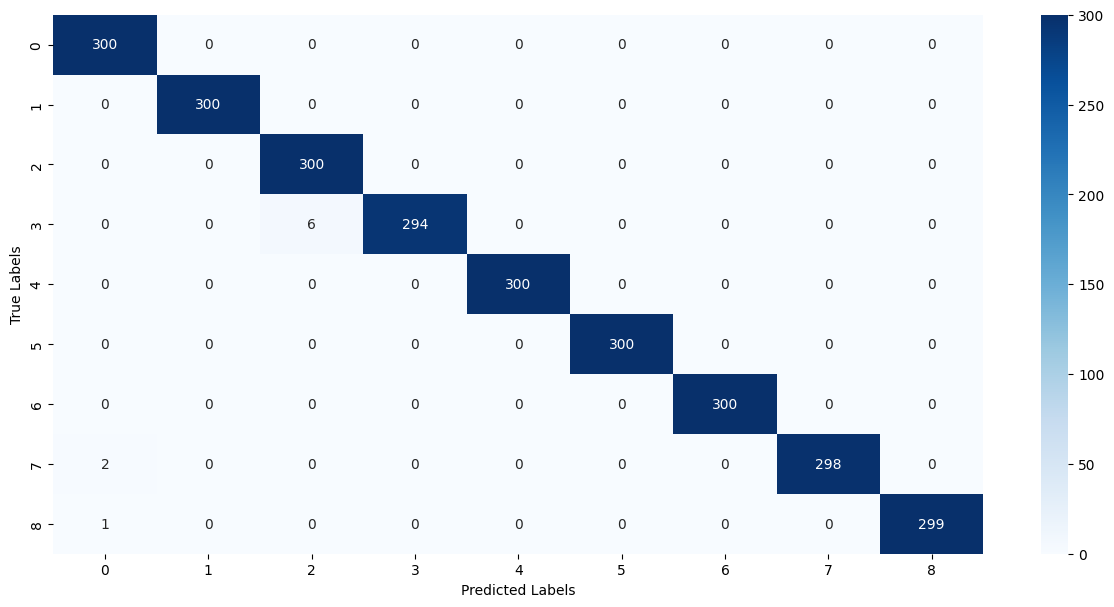

In [65]:
import seaborn as sns
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [66]:
# Building Predictive System
import cv2
from google.colab.patches import cv2_imshow
input_image_path = '/content/Dataset/DevanagariHandwrittenDigitDataset/Train/digit_9/10402.png'
input_image = cv2.imread(input_image_path)

In [67]:
type(input_image)

numpy.ndarray

In [68]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


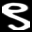

In [69]:
cv2_imshow(input_image)

In [70]:
input_image.shape

(32, 32, 3)

In [73]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale,(32,32))

In [74]:
input_image_resize.shape

(32, 32)

In [78]:
input_image_resize = input_image_resize/255     # converting individual image detail to 0-1
image_reshaped= np.reshape(input_image_resize, [1,32,32])     # notifying model that 1 data of size (28,28) is provided

In [79]:
input_pred = model.predict(image_reshaped)
input_pred

1/1 [==============================] - 0s 23ms/step


array([[7.0592499e-01, 9.6688354e-01, 7.5366911e-03, 3.0657628e-07,
        9.4822496e-01, 3.1157992e-06, 3.1844562e-01, 1.9001365e-02,
        9.9999762e-01, 8.1847229e-06]], dtype=float32)

In [80]:
input_pred_label = np.argmax(input_pred)
input_pred_label

8

MAIN PREDICTIVE SYSTEM

Path of Image to predict:/content/Dataset/DevanagariHandwrittenDigitDataset/Train/digit_6/10060.png


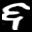

1/1 [==============================] - 0s 24ms/step
The Handwritten Digit is recognized as : 6


In [82]:
input_image_path = input("Path of Image to predict:")
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale,(32,32))
input_image_resize = input_image_resize/255  
image_reshaped= np.reshape(input_image_resize, [1,32,32]) 
input_pred = model.predict(image_reshaped)
input_pred_label = np.argmax(input_pred)
print("The Handwritten Digit is recognized as :", input_pred_label)